# 实训1　分析$1996\sim2015$年人口数据特征间的关系

## 实验任务及其说明

1. 训练要点
    1. 掌握`pyplot`基础语法。
    2. 掌握子图的绘制方法。
    3. 掌握散点图、折线图的绘制方法。
2. 需求说明
    &emsp;&emsp;人口数据总共拥有6个特征，分别为年末总人口、男性人口、女性人口、城镇人口、乡村人口和年份。查看各个特征随着时间推移繁盛的变化情况可以分析出未来男女人口比例、城乡人口变化的方向。
3. 实现步骤
    1. 使用`NumPy`库读取人口数据
    2. 创建画布，并添加子图
    3. 在两个子图上分别绘制散点图和折线图。
    4. 保存，显示图片。
    5. 分析未来人口变化趋势。

## 实验源代码

In [1]:
import numpy
# 载入数据
data = numpy.load('data/Training.npz', allow_pickle=True)
# 提取数据表列名
name = data['feature_names']
# 提取数据表内容
data = data['data']
# 时间轴翻转
data[:-2, :] = data[-3::-1, :]
# 获得数据表总行数
rows = numpy.shape(data)[0]

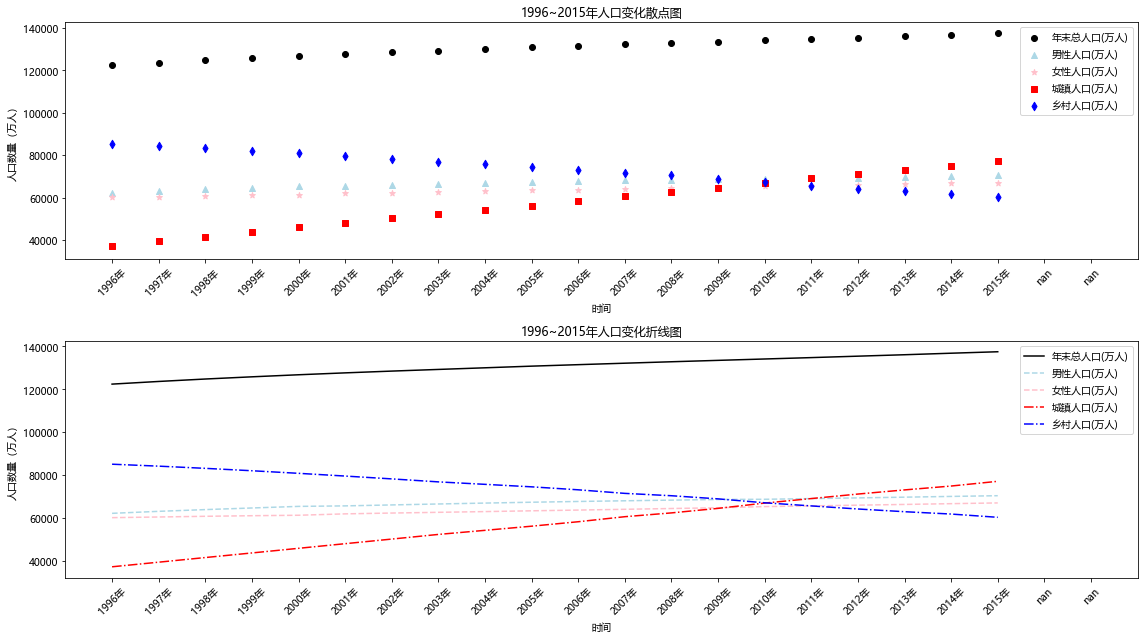

In [2]:
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.sans-serif'] = 'Microsoft YaHei'
pyplot.rcParams['axes.unicode_minus'] = False
# 使用 16:9 宽屏输出
figure = pyplot.figure(figsize=(16, 9))
# 散点图
figure.add_subplot(2, 1, 1)
pyplot.scatter(range(rows), data[:, 1], marker='o', c='black')
pyplot.scatter(range(rows), data[:, 2], marker='^', c='lightblue')
pyplot.scatter(range(rows), data[:, 3], marker='*', c='pink')
pyplot.scatter(range(rows), data[:, 4], marker='s', c='red')
pyplot.scatter(range(rows), data[:, 5], marker='d', c='blue')
pyplot.xlabel('时间')
pyplot.xlim((-1, rows))
pyplot.xticks(range(rows), data[:, 0], rotation=45)
pyplot.ylabel('人口数量（万人）')
pyplot.legend(name[1:], loc='best')
pyplot.title('1996~2015年人口变化散点图')
# 折线图
figure.add_subplot(2, 1, 2)
pyplot.plot(range(rows), data[:, 1], color='black', linestyle='-'
)
pyplot.plot(range(rows), data[:, 2], color='lightblue', linestyle='--')
pyplot.plot(range(rows), data[:, 3], color='pink', linestyle='--')
pyplot.plot(range(rows), data[:, 4], color='red', linestyle='-.')
pyplot.plot(range(rows), data[:, 5], color='blue', linestyle='-.')
pyplot.xlabel('时间')
pyplot.xlim((-1, rows))
pyplot.xticks(range(rows), data[:, 0], rotation=45)
pyplot.ylabel('人口数量（万人）')
pyplot.legend(name[1:], loc='best')
pyplot.title('1996~2015年人口变化折线图')
# 自动调整子图间距
figure.tight_layout()
pyplot.savefig('figures/T3-1.svg')
pyplot.show()

## 结果分析

&emsp;&emsp;根据上图可以看出，10年来人口在持续上涨并不断接近14亿大关；男多女少的态势持续了10年之久，但性别比例却维持得很好；千禧年的钟声敲响，从乡村持续涌入城镇的庞大人口为新世纪带来了变革，城镇成为了全国主要的人口聚集行政单位。